<a href='http://www.scienceacademy.ca'> <img style="float: left;height:70px" src="Log_SA.jpeg"></a>

# Decision Tree and Random Forests using scikit-learn in Python
### Heart Disease Data Set -- Cleveland data
Hi Guys,<br>

Welcome to the Decision Tree and Random Forests lecture using scikit-learn in Python. <br>

After learning key concepts on Decision Tree and Random Forests in the theory lecture, let's move on and use another famous dataset on [Heart Disease in Cleveland](https://archive.ics.uci.edu/ml/datasets/Heart+Disease). This original and full dataset is a part of [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.html) and contains 4 databases: ***Cleveland, Hungary, Switzerland, and the VA Long Beach.*** This dataset was donated to UCI Repository in 1988.<br>
The original database contains 76 attributes, but all published experiments by machine learning researchers refer to using a subset of 14 of them. <br>
In particular, the **Cleveland database** is the only one that has been used by the Machine Learning researchers to this date. In the original database, the "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).<br>

We are also using Cleveland database in this section. You can download the original one from the UCI website or use the one provided along with this course. I recommend using the one provided in the curse material because it is already cleaned for the missing data. A new column 'target' is also added with N (for 0) and Y (for 1,2,3,4).<br>

If you are interested to know more about the databases, please visit the link provided at the beginning.<br>
The information on the 14 attribute, that we are going to use, is provided below: 

* **age**--in years
* **sex**--(1 = male; 0 = female)
* **cp**--chest pain type (1: typical angina, 2: atypical angina, 3: non-anginal, pain 4: asymptomatic)  
* **trestbps** -- resting blood pressure
* **chol**--serum cholesterol in mg/dl
* **fbs**--fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
* **restecg**--resting ecg (electrocardiographic) results
* **thalach**--maximum heart rate achieved 
* **exang**--exercise induced angina (1 = yes; 0 = no)
* **oldpeak**--ST depression induced by exercise relative to rest 
* **slope**--the slope of the peak exercise ST segment (1: upsloping, 2: flat, 3: downsloping) 
* **ca**: number of major vessels (0-3) colored by flourosopy 
* **thal**: 3 = normal; 6 = fixed defect; 7 = reversable defect 
* **the predicted attribute** (0, 1, 2, 3 4) -- In the processed dataset, this one is added as a new column 'target' with 'N' for 0 and 'Y' for 1,2,3 & 4.<br>

Let's move on to the jupyter notebook and learn by doing.

#### Let's import the libraries and learn by doing!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading the data file in df

In [2]:
df = pd.read_csv("Desktop/HD_Cleveland_Data_Clean.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,N
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Y
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,Y
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,N
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,N


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
age         297 non-null int64
sex         297 non-null int64
cp          297 non-null int64
trestbps    297 non-null int64
chol        297 non-null int64
fbs         297 non-null int64
restecg     297 non-null int64
thalach     297 non-null int64
exang       297 non-null int64
oldpeak     297 non-null float64
slop        297 non-null int64
ca          297 non-null int64
thal        297 non-null int64
target      297 non-null object
dtypes: float64(1), int64(12), object(1)
memory usage: 32.6+ KB


In [5]:
#some statistics you might be interested in!
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


### Exploratory Data Analysis (EDA) -- only few plots

In [6]:
df['target'].value_counts()

N    160
Y    137
Name: target, dtype: int64

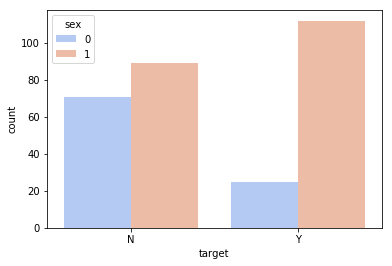

In [8]:
sns.countplot(x='target',data=df, hue='sex', palette='coolwarm')

So, in the collected data, most of the men were diagnosed with the heart disease! 

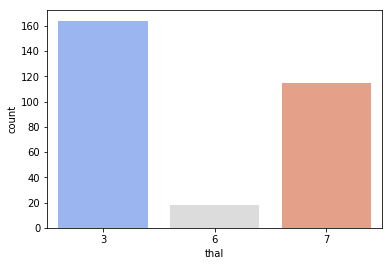

In [9]:
#thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
sns.countplot(x='thal',data=df, palette='coolwarm')#, hue='sex')

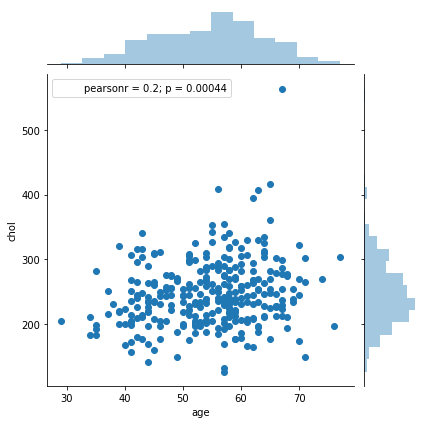

In [10]:
# Let's see how age is related to cholesterol, chol.
sns.jointplot(x='age', y='chol', data=df)

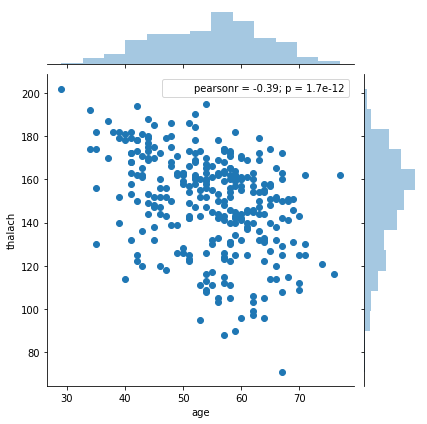

In [11]:
#thalach is the maximum heart rate achieved
sns.jointplot(x='age', y='thalach', data=df)

### Machine Learning Section
Our focus is Machine Learning, lets split the data and move on to the Machine Learning. If you want, you can do more EDA so that you get even better understanding of your dataset. <br>
We will start with training a single decision tree and than compare the results with Random Forest but first, we need to do train test split!
#### Train Test Split

Let's split up the data into a training set and a test set!

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df.drop('target',axis=1)
y = df['target']

In [14]:
# shift+tab and simply copy
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

#### Decision Trees

We'll start with training a single decision tree!

In [15]:
# importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [16]:
#Creating instance "dtree" of the classifier 
dtree = DecisionTreeClassifier()

In [17]:
#fitting to the training data, the default parameters are fine at the moment!
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Prediction and Evaluation 

Evaluation is important to see how did the model work!

In [18]:
# doing predictions 
predictions = dtree.predict(X_test)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix

In [20]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

             precision    recall  f1-score   support

          N       0.73      0.71      0.72        49
          Y       0.67      0.68      0.67        41

avg / total       0.70      0.70      0.70        90

[[35 14]
 [13 28]]


It looks like we are doing quite good using decision tree, the model is mislabeling some! <br><br><br>
### Random Forests
Let's try Random Forests model on the data and compare our results with the decision tree model. Random Forests is under ensemble class in the sklearn.


In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
# Creating instance and fitting the model
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

**Note:** Follow [this link](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) if you want to learn more about the parameter in RandomForestClassifier. We have only passed the n_estimatores = 100 here and this is the one we frequently use. The default values for all other parameters are considered.<br>


In [23]:
# doing predictions
rfc_pred = rfc.predict(X_test)

In [24]:
# Evaluation
print(classification_report(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))

             precision    recall  f1-score   support

          N       0.85      0.90      0.87        49
          Y       0.87      0.80      0.84        41

avg / total       0.86      0.86      0.85        90

[[44  5]
 [ 8 33]]


It looks like the random forest is gave improved results over a single tree for the dataset we have used. We got the better precision, recall and f1-score using Random Forest and less number of mislabeled samples!<br>

# Excellent work! 
